# Boston House Prices Dataset

In [166]:
from sklearn.datasets import load_boston
import numpy as np
import numpy.linalg as la
samples, targets = load_boston(return_X_y=True)
print (samples.shape)
print (targets.shape)

R = np.column_stack((samples,targets))
np.random.shuffle(R)
samples = R[:,:-1]; targets = R[:,-1]
labels = targets
print (samples.shape)
print (targets.shape)

(506, 13)
(506,)
(506, 13)
(506,)


# Least Squares

In [167]:
X = samples
t = targets.reshape(506,1)
ones = np.ones((506,1))
X = np.column_stack((samples,ones))
print(X.shape)
what = la.inv(X.transpose().dot(X)).dot(X.transpose()).dot(t)
y_hat = X.dot(what)
error = la.norm(t - y_hat)**2/X.shape[0]
print("what is: \n",what)
#w1 = what[0:-1]; b = what[-1]
#print(w1,b)
print("Least Squares Error: ", error)

(506, 14)
what is: 
 [[-1.08011358e-01]
 [ 4.64204584e-02]
 [ 2.05586264e-02]
 [ 2.68673382e+00]
 [-1.77666112e+01]
 [ 3.80986521e+00]
 [ 6.92224640e-04]
 [-1.47556685e+00]
 [ 3.06049479e-01]
 [-1.23345939e-02]
 [-9.52747232e-01]
 [ 9.31168327e-03]
 [-5.24758378e-01]
 [ 3.64594884e+01]]
Least Squares Error:  21.894831181729202


# K-fold Cross Validation

In [168]:
def LeastSquares(train,train_target,test):
    X = train
    t = train_target
    #t = train_target.reshape(len(train_target),1)
    #print(X.shape)
    what = la.inv(X.transpose().dot(X)).dot(X.transpose()).dot(t)
    y_hat = X.dot(what)
    lserror = la.norm(t - y_hat)**2/X.shape[0]
    
    y_pred = test.dot(what)
    return what, lserror, y_pred

In [169]:
def KFCV():
    test1 = X[0:101]; train1 = X[101:]; 
    test1_t = t[0:101]; train1_t = t[101:]

    test2 = X[101:202]; train2 = np.vstack((X[0:101],X[202:])) 
    test2_t = t[101:202]; train2_t = np.vstack((t[0:101],t[202:]))

    test3 = X[202:303]; train3 = np.vstack((X[0:202],X[303:])) ; 
    test3_t = t[202:303]; train3_t = np.vstack((t[0:202],t[303:])) ; 

    test4 = X[303:404]; train4 = np.vstack((X[0:303],X[404:])); 
    test4_t = t[303:404]; train4_t = np.vstack((t[0:303],t[404:]));

    test5 = X[404:]; train5 = X[0:404]; 
    test5_t = t[404:]; train5_t = t[0:404]
    
    what1, e1, ypred1 = LeastSquares(train1,train1_t,test1)
    what2, e2, ypred2 = LeastSquares(train2,train2_t,test2)
    what3, e3, ypred3 = LeastSquares(train3,train3_t,test3)
    what4, e4, ypred4 = LeastSquares(train4,train4_t,test4)
    what5, e5, ypred5 = LeastSquares(train5,train5_t,test5)
    
    ypreds = [ypred1,ypred2,ypred3,ypred4,ypred5]
    meas = [test1_t,test2_t,test3_t,test4_t,test5_t]

    error1 = la.norm(ypred1 - test1_t)**2/test1_t.shape[0]
    print("error1: ",error1)
    error2 = la.norm(ypred2 - test2_t)**2/test2_t.shape[0]
    print("error2: ",error2)
    error3 = la.norm(ypred3 - test3_t)**2/test3_t.shape[0]
    print("error3: ",error3)
    error4 = la.norm(ypred4 - test4_t)**2/test4_t.shape[0]
    print("error4: ",error4)
    error5 = la.norm(ypred5 - test5_t)**2/test5_t.shape[0]
    print("error5: ",error5)
    avg_error = (error1+error2+error3+error4+error5)/5
    print("Average Prediction Error is: ",avg_error)
    return ypreds, meas, avg_error


In [170]:
ys,ms, error = KFCV()

error1:  26.291790769709454
error2:  33.23012967564071
error3:  25.46880202307285
error4:  18.057135628741626
error5:  18.760681716997578
Average Prediction Error is:  24.361707962832444


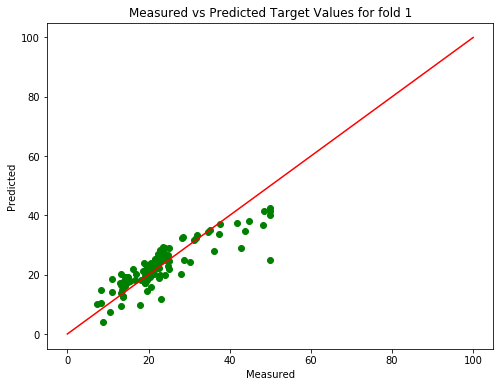

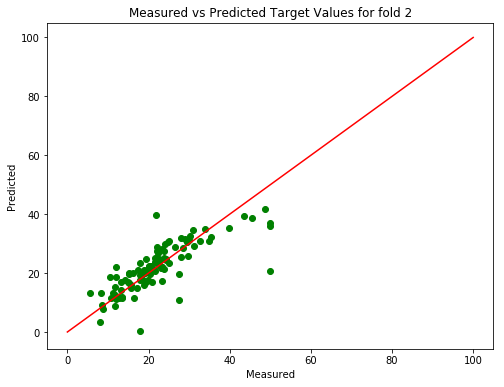

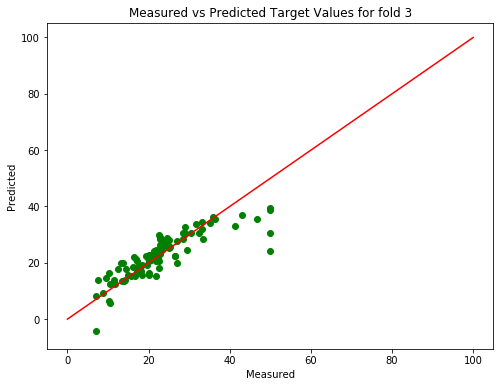

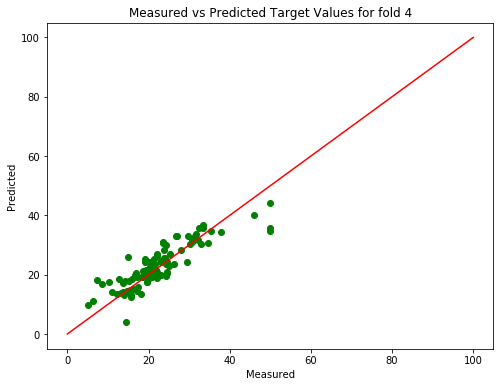

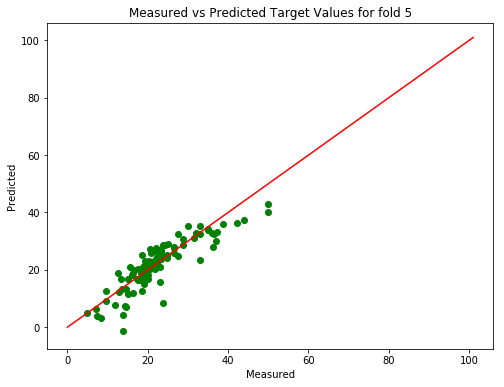

In [171]:
%matplotlib inline
import matplotlib.pyplot as plt

for i in range(len(ys)):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    ax.plot(np.arange(ms[i].shape[0]),np.arange(ms[i].shape[0]),c='r')
    ax.scatter(ms[i],ys[i],c='g',marker='o')

    ax.set_title("Measured vs Predicted Target Values for fold "+str(i+1))
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')

plt.show()

# Ridge Regression

Ridge Regression solves for $\hat{w}$ in the following form: $\hat{w} = (X^TX+\lambda I)^{-1} X^Ty$

In [172]:
def LeastSquares_RR(train,train_target,test,l):
    X = train
    #print(X.shape)
    t = train_target
    I = np.identity(X.shape[1])
    #t = train_target.reshape(len(train_target),1)
    #print(X.shape)
    what = la.inv(X.transpose().dot(X)+l*I).dot(X.transpose()).dot(t)
    y_hat = X.dot(what)
    lserror = la.norm(t - y_hat)**2/X.shape[0]
    
    y_pred = test.dot(what)
    return what, lserror, y_pred

In [173]:
def KFCV_RR(l, p):
           
    test1 = X[0:101]; train1 = X[101:404]; 
    test1_t = t[0:101]; train1_t = t[101:404]

    test2 = X[101:202]; train2 = np.vstack((X[0:101],X[202:404])) 
    test2_t = t[101:202]; train2_t = np.vstack((t[0:101],t[202:404]))

    test3 = X[202:303]; train3 = np.vstack((X[0:202],X[303:404])) ; 
    test3_t = t[202:303]; train3_t = np.vstack((t[0:202],t[303:404])) ; 

    test4 = X[303:404]; train4 = np.vstack((X[0:303],X[404:])); 
    test4_t = t[303:404]; train4_t = np.vstack((t[0:303],t[404:]));

    test5 = X[404:]; train5 = X[0:404]; 
    test5_t = t[404:]; train5_t = t[0:404]
    
    test = np.array([test1,test2,test3,test4,test5])
    test_t = np.array([test1_t,test2_t,test3_t,test4_t,test5_t])
    
    Errors = []
    for i in range(5):
        val = test[i]
        val_t = test_t[i]
        """ktt = np.asarray([[],[],[],[],[],[],[],[],[],[],[],[],[],[]]).transpose()
        ktt_t = np.asarray([[]]).transpose()
        for g in range(5):
            if g!=i:
                ktt = np.vstack((ktt,test[g]))
                ktt_t = np.vstack((ktt_t,test_t[g]))
        print(ktt)
        """
        ktt = []
        ktt_t = []
        for g in range(5):
            if g!=i:
                ktt.append(test[g])
                ktt_t.append(test_t[g])
        #print (test[:i].shape)
        #print (test[i+1].shape)
        """print (test.shape)
        ktt = np.vstack((test[:i],test[i+1:]))
        ktt_t = np.vstack((test_t[:i],test_t[i+1:]))
        """
        #print("len ktt is : ",len(ktt))
        whats = []
        es = []
        ypreds = []
        errors = []
        for j in range(4):
            testk = ktt[j]
            testk_t = ktt_t[j]
            train = []; train_t = []
            if len(ktt[:j])<=0:
                #print("----")
                train = np.vstack(ktt[j+1:])
                train_t = np.vstack(ktt_t[j+1:])
            elif ((j+1>=4) or len(ktt[j+1:])<0):
                #print("----ef")
                train = np.vstack(ktt[:j])
                train_t = np.vstack(ktt_t[:j])
            else:
                train = np.vstack(ktt[:j]+(ktt[j+1:]))
                train_t = np.vstack(ktt_t[:j]+ktt_t[j+1:])
                """print("----eee")
                if len(ktt[:j])==1:
                    train = ktt[:j]
                    train_t = ktt_t[:j]
                else:
                    train = np.vstack(ktt[:j])
                    train_t = np.vstack(ktt_t[:j])
                if len(ktt[j+1:])==1:
                    t2 = ktt[j+1:]
                    t2_t = ktt_t[j+1:]
                    train = np.vstack(train.append(t2))
                    train_t = np.vstack(train_t.append(t2))
                else:
                    t2 = np.vstack(ktt[j+1:])
                    t2_t = np.vstack(ktt_t[j+1:])
                
                    #print(train.shape,t2.shape)
                    #train = np.vstack((train,t2))
                    #train_t = np.vstack((train_t,t2_t))
                    train = np.vstack(train.append(t2))
                    train_t = np.vstack(train_t.append(t2))"""
            
            #print(train.shape)
            wh, e, ypred = LeastSquares_RR(train,train_t,testk,l)
            whats.append(wh)
            es.append(e)
            ypreds.append(ypred)
            error = la.norm(ypred - testk_t)**2/testk_t.shape[0]
            errors.append(error)
        kavg_error = np.mean(errors)
        idx = np.argmin(errors)
        yp = val.dot(whats[idx])
        new_e = la.norm(yp - val_t)**2/val_t.shape[0]
        Errors.append(new_e)
    return np.mean(Errors)


In [174]:
L = np.arange(0,3,0.001)
Errors = []
for l in L:
    Errors.append(KFCV_RR(l,False))
Errors = np.asarray(Errors)
i = np.argmin(Errors)
print("Optimal lambda is: ",L[i], "\nwith average prediction error: ",Errors[i])

Optimal lambda is:  0.015 
with average prediction error:  24.97773629786999
